<a href="https://colab.research.google.com/github/vgorbikov/optimization_mthds/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 8
## Задание
**А**. Методом перебора найти точку минимума $(x_1^*, x_2^*)$ функции $f(x_1, x_2)$ на множестве $[x_1', x_1''] \times [x_2', x_2'']$ с точностью $\epsilon$ и минимальное значение $f_*$:
$$f(x_1, x_2) = (x_2 - x_1^2)^2 + (1 - x_1^2)$$
$$[x_1', x_1''] \times [x_2', x_2'']= [-1, 2] \times [-3, 3]$$
$$\epsilon = 0.01$$

**Б**: Методом Ньютона найти точку минимума $(x_1^*, x_2^*)$ той же функции $f(x_1, x_2)$ на множестве $[x_1', x_1''] \times [x_2', x_2'']$ с точностью $\epsilon$ и минимальное значение $f_*$, начальную точку определить самостоятельно, сравнить время поиска точки минимума двумя предложенными алгоритмами.



## Решение
**А**:

In [32]:
from typing import Callable, Tuple
import time

from numpy import ndarray
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd.functional import hessian



# исследуемая функция
target_f = lambda x1, x2: (x2-x1**2)**2 + (1-x1**2)
target_grad = lambda x1, x2: [4*(x2-x1**2)*x1 - 2*x1, 2*(x2-x1**2)]
bounds = ((-1, 2), (-3, 3))
eps = 0.01

#более простая функция для проверки
parab = lambda x1, x2: (x1 - 1.3)**2 + (x2 + 4.76)**2
para_grad = lambda x1, x2: [2*(x1-1.3), 2*(x2+4.76)]

In [ ]:
def timer():
  pass

In [33]:
def bruteforce_mthd(f: Callable[[float], float], bounds_x1: Tuple[float], bounds_x2: Tuple[float], accuracy: float, imshow: bool = 'False'):
  step_size = np.sqrt(accuracy**2/2)*0.95
  points = np.array([
      [(bounds_x1[0]+i1*step_size, bounds_x2[0]+i2*step_size) for i1 in range(round((bounds_x1[1]-bounds_x1[0])/step_size))]
      for i2 in range(round((bounds_x2[1]-bounds_x2[0])/step_size))])
  values = np.array([[f(*point) for point in row] for row in points])

  if imshow:
    plt.imshow(values, cmap='hot')
    plt.show()

  min_index = np.argmin(values)
  min_point = points[min_index//points.shape[1]][min_index%points.shape[1]]
  min_f = values.flatten()[min_index]

  return min_point, min_f

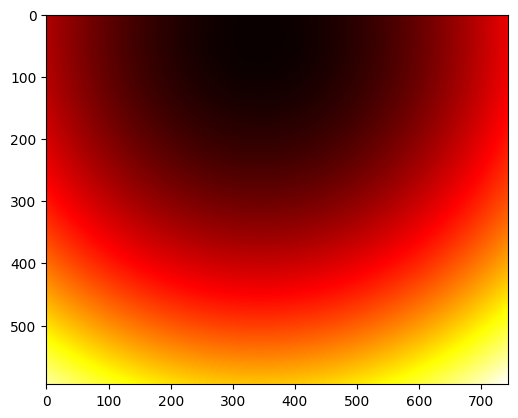

Точка минимума: (x1*, x2*) = (1.2973899320750926, -4.7581694808342005) 
Значение минимума: f* = 1.0163254988989165e-05


In [34]:
#параболическая функция
answer = bruteforce_mthd(parab, (-1, 4), (-5, -1), 0.01, True)
print(f'Точка минимума: (x1*, x2*) = ({answer[0][0]}, {answer[0][1]}) \nЗначение минимума: f* = {answer[1]}')

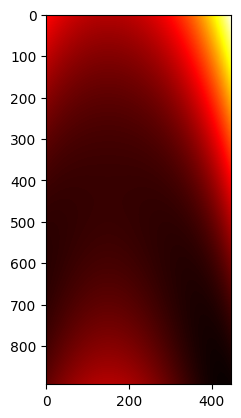

Точка минимума: (x1*, x2*) = (1.86837865788323, 2.992022863774803) 
Значение минимума: f* = -2.2420214617896463


In [35]:
#заданная функция
answer = bruteforce_mthd(target_f, bounds[0], bounds[1], eps, True)
print(f'Точка минимума: (x1*, x2*) = ({answer[0][0]}, {answer[0][1]}) \nЗначение минимума: f* = {answer[1]}')

**B**:

In [47]:
def newtone_mthd(f, grad_f, bounds_x1: Tuple[float], bounds_x2: Tuple[float], start_point: Tuple[float], accuracy: float):
  x0 = torch.tensor(start_point, dtype=float)

  hess = torch.tensor(hessian(f, (x0[0], x0[1])))
  inv_hess = torch.linalg.inv(hess)
  grad = torch.tensor(grad_f(*x0), dtype=float)

  old_x = torch.tensor([bounds_x1[0], bounds_x2[1]])

  while np.sqrt((old_x[0]-x0[0])**2 + (old_x[1]-x0[1])**2) >= accuracy:
    old_x = np.copy(x0)
    step = torch.matmul(inv_hess, grad)

    # ограничиваем оптимизацию в заданной области
    if x0[0] - step[0] < bounds_x1[0]:
      step[0] = x0[0] - bounds_x1[0]
    if x0[0] - step[0] > bounds_x1[1]:
      step[0] = x0[0] - bounds_x1[1]
    if x0[1] - step[1] < bounds_x2[0]:
      step[1] = x0[1] - bounds_x2[0]
    if x0[1] - step[1] > bounds_x2[1]:
      step[1] = x0[1] - bounds_x2[1]

    x0 -= step

    # print(f'Приближение: (x1*, x2*) = ({x0[0]}, {x0[1]}); Значение: f* = {f(*x0)}')

    hess = torch.tensor(hessian(f, (x0[0], x0[1])))
    inv_hess = torch.linalg.inv(hess)
    grad = torch.tensor(grad_f(*x0), dtype=float)

  return x0, f(*x0)

In [48]:
#параболическая функция
answer = newtone_mthd(parab, para_grad, (-1, 4), (-5, -1), (1.5, 1), eps)
print(f'Точка минимума: (x1*, x2*) = ({answer[0][0]}, {answer[0][1]}) \nЗначение минимума: f* = {answer[1]}')

Приближение: (x1*, x2*) = (1.3, -4.76); Значение: f* = 0.0
Приближение: (x1*, x2*) = (1.3, -4.76); Значение: f* = 0.0
Точка минимума: (x1*, x2*) = (1.3, -4.76) 
Значение минимума: f* = 0.0


In [49]:
#заданная функция
answer = newtone_mthd(target_f, target_grad, bounds[0], bounds[1], (1.5, 1), eps)
print(f'Точка минимума: (x1*, x2*) = ({answer[0][0]}, {answer[0][1]}) \nЗначение минимума: f* = {answer[1]}')

Приближение: (x1*, x2*) = (2.0, 3.0); Значение: f* = -2.0
Приближение: (x1*, x2*) = (2.0, 3.0); Значение: f* = -2.0
Точка минимума: (x1*, x2*) = (2.0, 3.0) 
Значение минимума: f* = -2.0
